In [6]:
from scipy import *
import scipy
import random
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [7]:
fname_mask = 'cw/selected_dataset/selected_from_train/masks'
fname_image = 'cw/selected_dataset/selected_from_train/images'

#fname_mask = 'cw/selected_dataset/selected_from_val/masks'
#fname_image = 'cw/selected_dataset/selected_from_val/images'
#39, 25, 47, 74 ,83

i = 83 # selected picture
img = cv.imread(os.path.join(fname_image, '{}.bmp'.format(i)))
mask = cv.imread(os.path.join(fname_mask, '{}.bmp'.format(i)))
print(mask.shape, img.shape)

(522, 775, 3) (522, 775, 3)


True

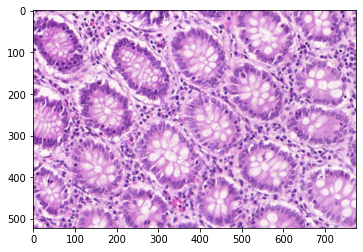

In [8]:
RGB_im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(RGB_im)
cv.imwrite('18.04/img.jpg', RGB_im)

(522, 775, 3)


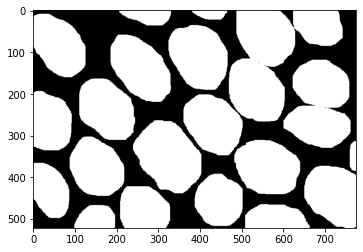

In [10]:
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size))
mask_dilation = cv.dilate(mask, kernel)

kernel_size = 10
kernel = np.ones((kernel_size, kernel_size))
mask_erosion = cv.erode(mask, kernel)

plt.imshow(mask_dilation)
#plt.imshow(mask_erosion)
print(mask.shape)

In [11]:
# remove cell from image
# delation
new_mask = 1 - mask_dilation//255
background = new_mask * img

True

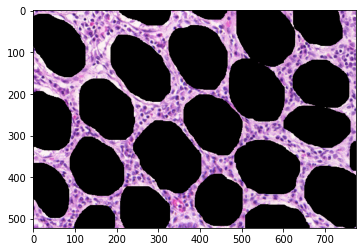

In [12]:
# BGR to RGB
RGB_background = cv.cvtColor(background, cv.COLOR_BGR2RGB)
plt.imshow(RGB_background)
cv.imwrite('18.04/back_wo_cells.jpg', RGB_background)

297


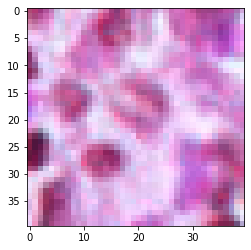

In [13]:
# cut image into patches, select ones only with background

shape = background.shape # (522, 775, 3)
patches = []
size = 40  # patch size
stride = 5 
for i in range(0, shape[0] - size, stride):
    for j in range(0, shape[1] - size, stride):
        patch = background[i:i+size, j:j+size,:]
        mask_patch = mask_dilation[i:i+size, j:j+size,:]
        if np.sum(mask_patch) == 0:
            patches.append(patch)
print(len(patches))
plt.imshow(patches[50])

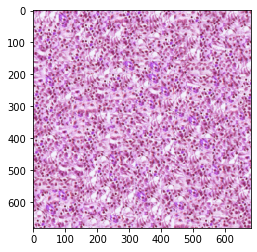

In [14]:
# new background for deleted cells

new_size = np.sqrt(len(patches))

value = int(new_size)

cat = [[]]*value
random.shuffle(patches)
for k in range(value):
    cat[k] = np.concatenate([patches[k*value + i] for i in range(value)], axis=1)

cat_all = np.concatenate([cat[i] for i in range(value)])
plt.imshow(cat_all)

In [15]:
shape = mask_dilation.shape
w = min(cat_all.shape[0], mask_dilation.shape[0])
h = min(cat_all.shape[1], mask_dilation.shape[1])
background_reshaped = cat_all[:w, :h, :]
background_reshaped.shape

(522, 680, 3)

True

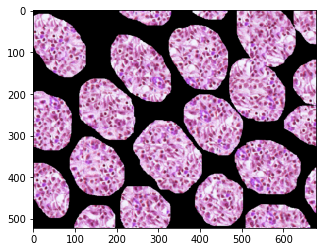

In [16]:
# put new background into empty spaces

plt.imshow(mask_dilation[:w, :h, :]//255*background_reshaped)
cells_wo_back = cv.cvtColor(mask_dilation[:w, :h, :]//255*background_reshaped, cv.COLOR_BGR2RGB)

cv.imwrite('18.04/cells_wo_back.jpg', cells_wo_back)

True

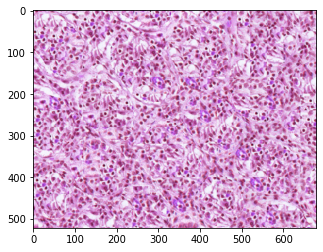

In [17]:
# result

result = mask_dilation[:w, :h, :]//255*background_reshaped[:w, :h, :] + background[:w, :h, :]

plt.imshow(result)
result.shape
im_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)
cv.imwrite('18.04/res2.jpg', im_rgb)

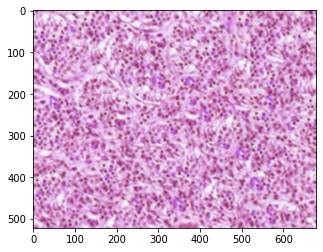

In [18]:
# smooth 

kernel = np.ones((5,5),np.float32)/25
result_smooth = cv.filter2D(result, -1, kernel)
plt.imshow(result_smooth)

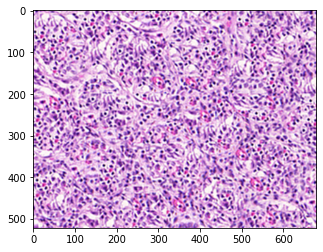

In [19]:
# sharpen 

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
result_final = cv.filter2D(result_smooth, -1, kernel)
RGB_im = cv.cvtColor(result_final, cv.COLOR_BGR2RGB)
plt.imshow(RGB_im)

In [126]:
cv.imwrite("background_images/7.jpg", result)

True